In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score


In [9]:
df = pd.read_csv('/content/breast-cancer.csv')

In [10]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [11]:
df.shape

(569, 32)

In [12]:
df.describe().round()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count        569.0        569.0         569.0           569.0      569.0   
mean    30371831.0         14.0          19.0            92.0      655.0   
std    125020586.0          4.0           4.0            24.0      352.0   
min         8670.0          7.0          10.0            44.0      144.0   
25%       869218.0         12.0          16.0            75.0      420.0   
50%       906024.0         13.0          19.0            86.0      551.0   
75%      8813129.0         16.0          22.0           104.0      783.0   
max    911320502.0         28.0          39.0           188.0     2501.0   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count            569.0             569.0           569.0                569.0   
mean               0.0               0.0             0.0                  0.0   
std                0.0               0.0             0.0                  0.0   
min                0.0               0.0             0.0                  0.0   
25%                0.0               0.0             0.0                  0.0   
50%                0.0               0.0             0.0                  0.0   
75%                0.0               0.0             0.0                  0.0   
max                0.0               0.0             0.0                  0.0   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count          569.0  ...         569.0          569.0            569.0   
mean             0.0  ...          16.0           26.0            107.0   
std              0.0  ...           5.0            6.0             34.0   
min              0.0  ...           8.0           12.0             50.0   
25%              0.0  ...          13.0           21.0             84.0   
50%              0.0  ...          15.0           25.0             98.0   
75%              0.0  ...          19.0           30.0            125.0   
max              0.0  ...          36.0           50.0            251.0   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count       569.0             569.0              569.0            569.0   
mean        881.0               0.0                0.0              0.0   
std         569.0               0.0                0.0              0.0   
min         185.0               0.0                0.0              0.0   
25%         515.0               0.0                0.0              0.0   
50%         686.0               0.0                0.0              0.0   
75%        1084.0               0.0                0.0              0.0   
max        4254.0               0.0                1.0              1.0   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count                 569.0           569.0                    569.0  
mean                    0.0             0.0                      0.0  
std                     0.0             0.0                      0.0  
min                     0.0             0.0                      0.0  
25%                     0.0             0.0                      0.0  
50%                     0.0             0.0                      0.0  
75%                     0.0             0.0                      0.0  
max                     0.0             1.0                      0.0  

[8 rows x 31 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
df.replace({'diagnosis':{'M':0,'B':1}},inplace=True)

In [17]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          0        17.99         10.38          122.80     1001.0   
1    842517          0        20.57         17.77          132.90     1326.0   
2  84300903          0        19.69         21.25          130.00     1203.0   
3  84348301          0        11.42         20.38           77.58      386.1   
4  84358402          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [18]:
df.tail()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424          0        21.56         22.39          142.00     1479.0   
565  926682          0        20.13         28.25          131.20     1261.0   
566  926954          0        16.60         28.08          108.30      858.1   
567  927241          0        20.60         29.33          140.10     1265.0   
568   92751          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [19]:
df.duplicated().sum()


0

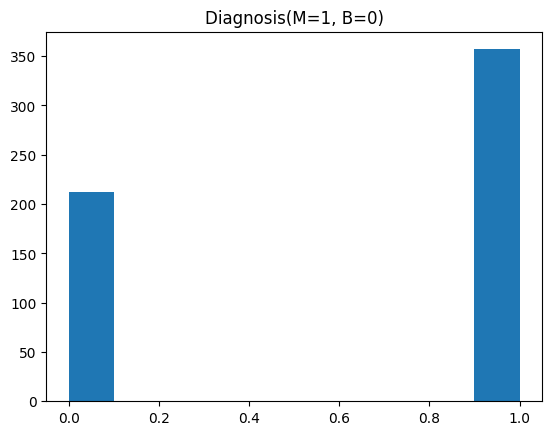

In [20]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

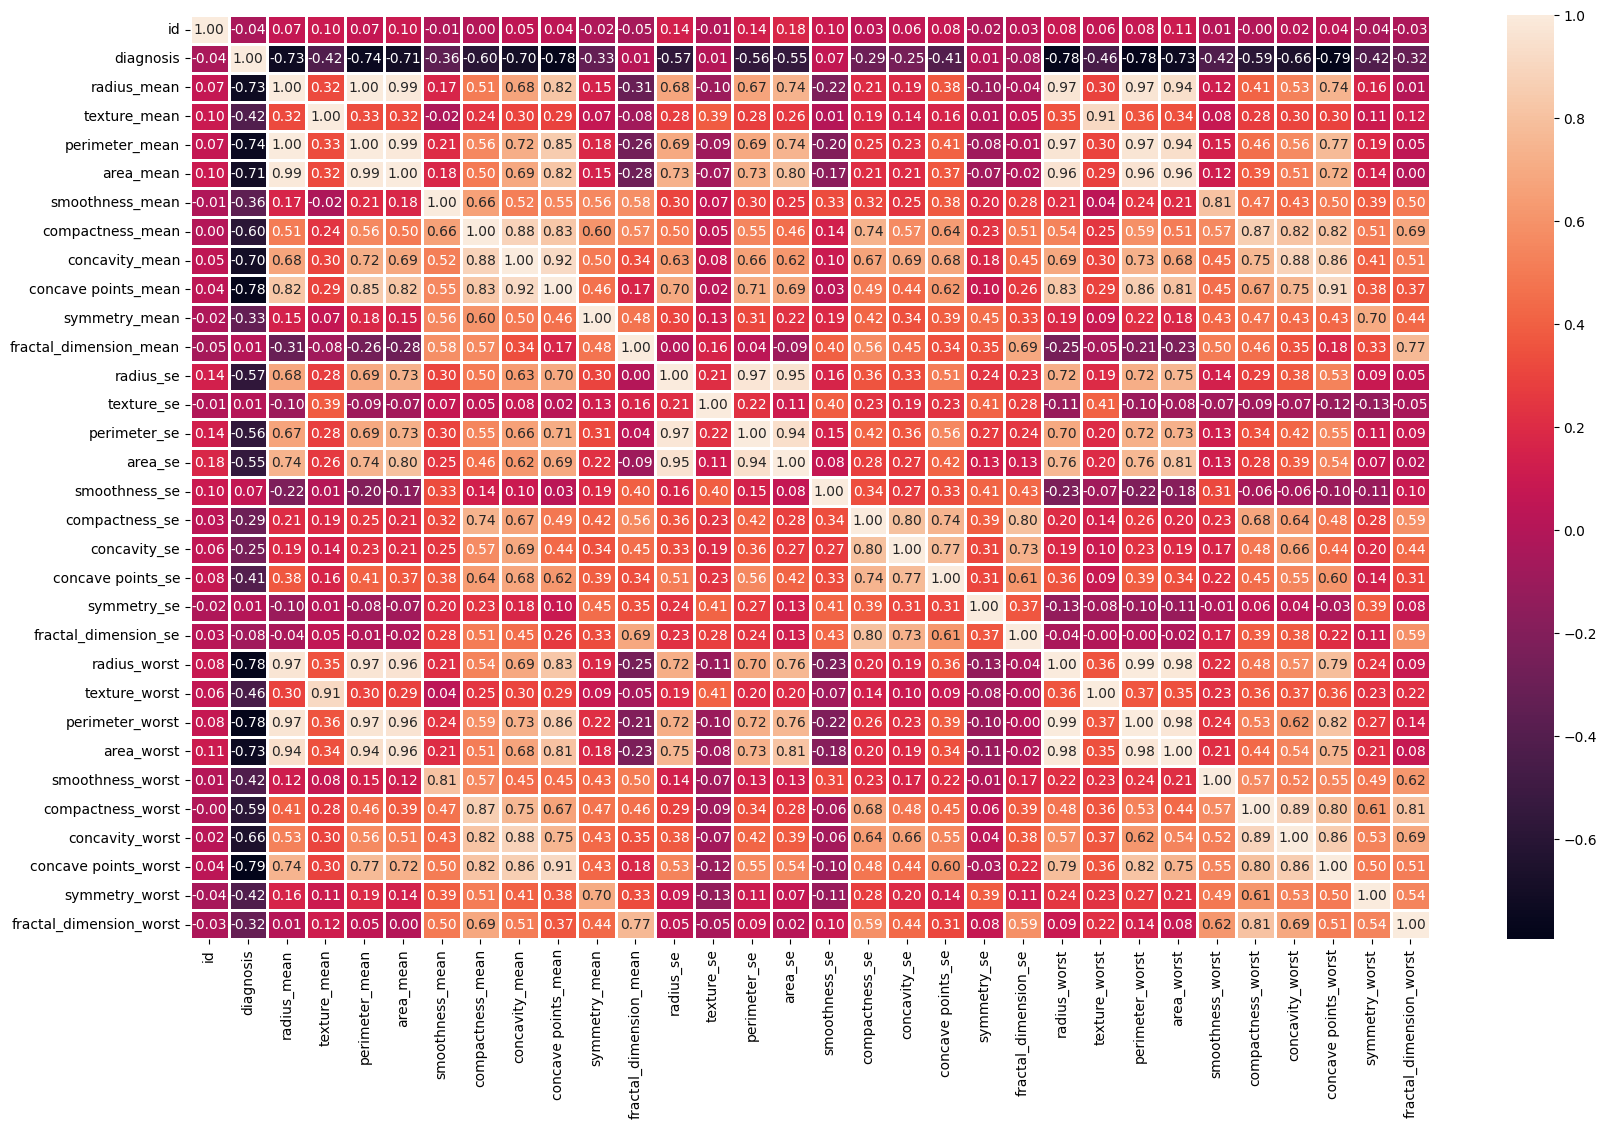

In [21]:
plt.figure(figsize=(20,12))
corr=df.corr()
sns.heatmap(corr,  linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [22]:
df.drop(columns = 'id', axis = 1, inplace = True)

In [23]:
# Get value of correlation
corr_values = abs(corr["diagnosis"])
# Select highly correlated features
relevant_features = corr_values[corr_values>0.2]
relevant_features = list(relevant_features.index)
relevant_features.remove('diagnosis')

X = df[relevant_features]
y = df['diagnosis'].values

In [24]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     radius_se  ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0       1.0950  ...        25.380          17.33           184.60      2019.0   
1       0.5435  ...        24.990          23.41           158.80      1956.0   
2       0.7456  ...        23.570          25.53           152.50      1709.0   
3       0.4956  ...        14.910          26.50            98.87       567.7   
4       0.7572  ...        22.540          16.67           152.20      1575.0   
..         ...  ...           ...            ...              ...         ...   
564     1.1760  ...        25.450          26.40           166.10      2027.0   
565     0.7655  ...        23.690          38.25           155.00      1731.0   
566     0.4564  ...        18.980          34.12           126.70      1124.0   
567     0.7260  ...        25.740          39.42           184.60      1821.0   
568     0.3857  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X)

array([[ 1.13235294, -1.5026643 ,  1.26374006, ...,  1.71524826,
         2.63555556,  1.88457808],
       [ 1.76470588, -0.19005329,  1.61285862, ...,  0.89219446,
        -0.10666667,  0.43549952],
       [ 1.54901961,  0.42806394,  1.51261666, ...,  1.48305173,
         1.17185185,  0.3656644 ],
       ...,
       [ 0.79166667,  1.64120782,  0.76253025, ...,  0.43402094,
        -0.89481481, -0.08923375],
       [ 1.77205882,  1.86323268,  1.86173522, ...,  1.7111019 ,
         1.87407407,  2.13191077],
       [-1.375     ,  1.01243339, -1.32457656, ..., -1.03586607,
         0.07259259, -0.46799224]])

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lg = LogisticRegression()
lg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25],
}
grid_search_lg = GridSearchCV(estimator=lg,
                               param_grid=lg_params,
                               cv=cv,
                               verbose=1,
                               )
grid_result_lg = grid_search_lg.fit(X_train, Y_train)
grid_result_lg.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 25, 'penalty': 'l2'}

In [30]:
lg = lg.set_params(**grid_result_lg.best_params_)


In [31]:
lg.fit(X_train, Y_train)
y_pred_lg = lg.predict(X_test)

In [32]:
print(classification_report(Y_test, y_pred_lg))
print(confusion_matrix(Y_test, y_pred_lg))
print(f'ROC-AUC score : {roc_auc_score(Y_test, y_pred_lg)}')
print(f'Accuracy score : {accuracy_score(Y_test, y_pred_lg)}')

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]
ROC-AUC score : 0.9580740255486406
Accuracy score : 0.9649122807017544


In [ ]:
svc = svc.set_params(**grid_result_svc.best_params_)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_svc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_svc)}')

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=dt_params,
                              cv=cv,
                              verbose=1)

grid_result_dt = grid_search_dt.fit(X_train, Y_train)
print("Best parameters for Decision Tree:", grid_result_dt.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [34]:
dt = DecisionTreeClassifier().set_params(**grid_result_dt.best_params_)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

# Print evaluation metrics
print("Decision Tree Classification Report:")
print(classification_report(Y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_dt))
print(f'ROC-AUC score: {roc_auc_score(Y_test, y_pred_dt)}')
print(f'Accuracy score: {accuracy_score(Y_test, y_pred_dt)}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[39  4]
 [ 1 70]]
ROC-AUC score: 0.9464461185718965
Accuracy score: 0.956140350877193


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Simplified parameter grid for faster execution
rf_params = {
    'n_estimators': [50, 100],  # Fewer trees
    'criterion': ['gini'],      # Only one criterion
    'max_depth': [None, 10],    # Fewer depth options
    'min_samples_split': [2],   # Only the default value
    'min_samples_leaf': [1]     # Only the default value
}

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=rf_params,
                              cv=cv,
                              verbose=1)

grid_result_rf = grid_search_rf.fit(X_train, Y_train)
print("Best parameters for Random Forest:", grid_result_rf.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
rf = RandomForestClassifier().set_params(**grid_result_rf.best_params_)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

# Print evaluation metrics
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rf))
print(f'ROC-AUC score: {roc_auc_score(Y_test, y_pred_rf)}')
print(f'Accuracy score: {accuracy_score(Y_test, y_pred_rf)}')


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 1 70]]
ROC-AUC score: 0.9580740255486406
Accuracy score: 0.9649122807017544


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Different numbers of neighbors
    'weights': ['uniform', 'distance'],   # Weighting strategies
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=knn_params,
                               cv=cv,
                               verbose=1)

grid_result_knn = grid_search_knn.fit(X_train, Y_train)
print("Best parameters for KNN:", grid_result_knn.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [39]:
# Set the best parameters and refit the model
knn = KNeighborsClassifier().set_params(**grid_result_knn.best_params_)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

# Print evaluation metrics
print("\nKNN Classification Report:")
print(classification_report(Y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_knn))
print(f'ROC-AUC score: {roc_auc_score(Y_test, y_pred_knn)}')
print(f'Accuracy score: {accuracy_score(Y_test, y_pred_knn)}')



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[37  6]
 [ 1 70]]
ROC-AUC score: 0.9231903046184081
Accuracy score: 0.9385964912280702


In [40]:
svc_linear = SVC(kernel='linear', C=1, gamma='scale')  # Set C and gamma as desired
svc_linear.fit(X_train, Y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

# Print evaluation metrics for 'linear' kernel
print("SVC with Linear Kernel - Classification Report:")
print(classification_report(Y_test, y_pred_svc_linear))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svc_linear))
print(f'ROC-AUC score: {roc_auc_score(Y_test, y_pred_svc_linear)}')
print(f'Accuracy score: {accuracy_score(Y_test, y_pred_svc_linear)}')

SVC with Linear Kernel - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 1 70]]
ROC-AUC score: 0.9580740255486406
Accuracy score: 0.9649122807017544


In [41]:
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')  # Set C and gamma as desired
svc_rbf.fit(X_train, Y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

# Print evaluation metrics for 'rbf' kernel
print("\nSVC with RBF Kernel - Classification Report:")
print(classification_report(Y_test, y_pred_svc_rbf))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svc_rbf))
print(f'ROC-AUC score: {roc_auc_score(Y_test, y_pred_svc_rbf)}')
print(f'Accuracy score: {accuracy_score(Y_test, y_pred_svc_rbf)}')


SVC with RBF Kernel - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[37  6]
 [ 0 71]]
ROC-AUC score: 0.9302325581395349
Accuracy score: 0.9473684210526315


In [43]:
import joblib
from google.colab import files

In [44]:
scaler_file = 'robust_scaler.pkl'
joblib.dump(scaler, scaler_file)


['robust_scaler.pkl']

In [45]:
rf_file = 'random_forest_model.pkl'
joblib.dump(grid_result_rf.best_estimator_, rf_file)

['random_forest_model.pkl']

In [47]:
svc_rbf_file = 'svc_rbf_model.pkl'
joblib.dump(svc_rbf, svc_rbf_file)

['svc_rbf_model.pkl']

In [48]:
svc_linear_file = 'svc_linear_model.pkl'
joblib.dump(svc_linear, svc_linear_file)

['svc_linear_model.pkl']

In [49]:
knn_file = 'knn_model.pkl'
joblib.dump(knn, knn_file)

['knn_model.pkl']

In [50]:
dt_file = 'decision_tree_model.pkl'
joblib.dump(dt, dt_file)

['decision_tree_model.pkl']

In [53]:
lg_file = 'logistic_regression_model.pkl'
joblib.dump(lg, lg_file)

['logistic_regression_model.pkl']